In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("diesel_data.xlsx")

In [4]:
df.head(5)

,Date,Value-Added Tax (KDV)(%),Excise Duty (OTV-TL/l),USD / TRY rate(1$=TL),Consumer Price Index (TUFE-Monthly Diff),Turkey Diesel Usage (Tons),Crude Oil Price (Brent-$),Pump Selling Price(TL PER LİTER)
0,2020-01-01,18,1.694,5.9540,1.35,"1,780,152.261",66.00,6.493
1,2020-01-02,18,1.694,5.9537,1.35,"1,780,152.261",66.25,6.493
2,2020-01-03,18,1.694,5.9674,1.35,"1,780,152.261",68.60,6.493
3,2020-01-04,18,1.694,5.9824,1.35,"1,780,152.261",68.60,6.493
4,2020-01-05,18,1.694,5.9824,1.35,"1,780,152.261",68.60,6.493


In [5]:
df.dtypes

Date                                        datetime64[ns]
Value-Added Tax (KDV)(%)                             int64
Excise Duty (OTV-TL/l)                             float64
USD / TRY rate(1$=TL)                              float64
Consumer Price Index (TUFE-Monthly Diff)           float64
Turkey Diesel Usage (Tons)                          object
Crude Oil Price (Brent-$)                          float64
Pump Selling Price(TL PER LİTER)                   float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      1368 non-null   datetime64[ns]
 1   Value-Added Tax (KDV)(%)                  1368 non-null   int64         
 2   Excise Duty (OTV-TL/l)                    1368 non-null   float64       
 3   USD / TRY rate(1$=TL)                     1368 non-null   float64       
 4   Consumer Price Index (TUFE-Monthly Diff)  1368 non-null   float64       
 5   Turkey Diesel Usage (Tons)                1368 non-null   object        
 6   Crude Oil Price (Brent-$)                 1368 non-null   float64       
 7   Pump Selling Price(TL PER LİTER)          1368 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 85.6+ KB


we need to convert object to int by removing ',' in values and it will be float64.
But let's make simple the name of columns

In [7]:
df.rename(columns={
    'Value-Added Tax (KDV)(%)': 'KDV',
    'Excise Duty (OTV-TL/l)': 'OTV',
    'USD / TRY rate(1$=TL)': 'USD',
    'Consumer Price Index (TUFE-Monthly Diff)': 'TUFE',
    'Turkey Diesel Usage (Tons)': 'USAGE',
    'Crude Oil Price (Brent-$)': 'CRUDE OIL',
    'Pump Selling Price(TL PER LİTER)': 'PRICE',
}, inplace=True)

In [8]:
df.head()

,Date,KDV,OTV,USD,TUFE,USAGE,CRUDE OIL,PRICE
0,2020-01-01,18,1.694,5.9540,1.35,"1,780,152.261",66.00,6.493
1,2020-01-02,18,1.694,5.9537,1.35,"1,780,152.261",66.25,6.493
2,2020-01-03,18,1.694,5.9674,1.35,"1,780,152.261",68.60,6.493
3,2020-01-04,18,1.694,5.9824,1.35,"1,780,152.261",68.60,6.493
4,2020-01-05,18,1.694,5.9824,1.35,"1,780,152.261",68.60,6.493


In [9]:

df['USAGE'] = df['USAGE'].str.replace(',', '').astype(float)


In [10]:
df["USAGE"]

0       1780152.261
1       1780152.261
2       1780152.261
3       1780152.261
4       1780152.261
           ...     
1363    2276329.530
1364    2276329.530
1365    2276329.530
1366    2276329.530
1367    2276329.530
Name: USAGE, Length: 1368, dtype: float64

In [11]:
df.dtypes

Date         datetime64[ns]
KDV                   int64
OTV                 float64
USD                 float64
TUFE                float64
USAGE               float64
CRUDE OIL           float64
PRICE               float64
dtype: object

In [12]:
df.head()

,Date,KDV,OTV,USD,TUFE,USAGE,CRUDE OIL,PRICE
0,2020-01-01,18,1.694,5.9540,1.35,1780152.261,66.00,6.493
1,2020-01-02,18,1.694,5.9537,1.35,1780152.261,66.25,6.493
2,2020-01-03,18,1.694,5.9674,1.35,1780152.261,68.60,6.493
3,2020-01-04,18,1.694,5.9824,1.35,1780152.261,68.60,6.493
4,2020-01-05,18,1.694,5.9824,1.35,1780152.261,68.60,6.493


## We do not have any null value.
We have 7 independent variables and 1 dependent variable and in total 8 column we have.

In [13]:
df.describe()

,Date,KDV,OTV,USD,TUFE,USAGE,CRUDE OIL,PRICE
count,1368,1368.000000,1368.000000,1368.000000,1368.000000,1.368000e+03,1368.000000,1368.000000
mean,2021-11-14 12:00:00,18.133041,2.070631,13.097406,3.080592,2.119947e+06,303.781996,14.691075
min,2020-01-01 00:00:00,18.000000,0.000000,5.872300,0.040000,1.528046e+06,19.330000,5.133000
25%,2020-12-07 18:00:00,18.000000,1.694000,7.561550,1.130000,1.877727e+06,56.095000,6.493000
50%,2021-11-14 12:00:00,18.000000,2.056000,9.946500,2.130000,2.174069e+06,75.625000,8.568000
75%,2022-10-22 06:00:00,18.000000,2.056000,18.627725,3.540000,2.330828e+06,87.360000,22.110000
max,2023-09-29 00:00:00,20.000000,7.056000,27.465700,13.580000,2.654149e+06,45166.000000,39.181000
std,NaN,0.498562,1.446531,6.240954,2.971275,2.798118e+05,3213.646889,9.519796


In [14]:
#df.to_excel('lastData2.xlsx', index=False)

In [15]:
correlation_matrix = df.corr()

correlation_with_price = correlation_matrix['PRICE']
print(correlation_with_price)

Date         0.882997
KDV          0.577028
OTV          0.659107
USD          0.951320
TUFE         0.469220
USAGE        0.060717
CRUDE OIL   -0.065582
PRICE        1.000000
Name: PRICE, dtype: float64


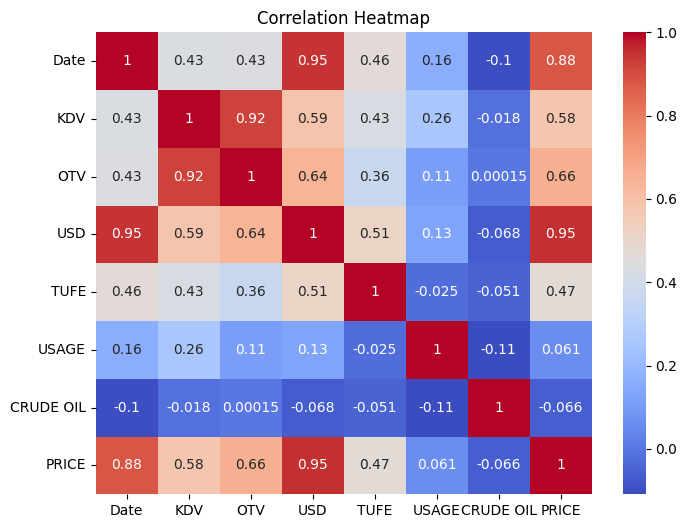

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

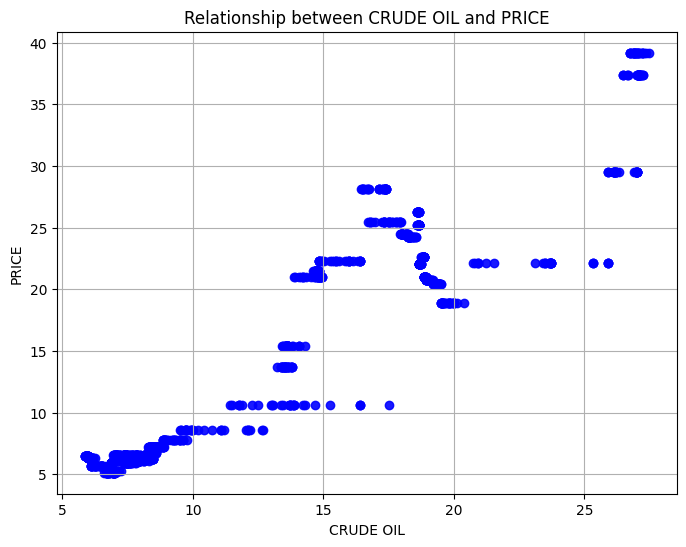

In [17]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['USD'], df['PRICE'], color='blue', alpha=0.9)
plt.title('Relationship between CRUDE OIL and PRICE')
plt.xlabel('CRUDE OIL')
plt.ylabel('PRICE')
plt.grid(True)
plt.show()

Normalization and Standardization

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [19]:

cols_to_normalize = df.columns.difference(['Date', 'PRICE'])

# Creating a MinMaxScaler instance
scaler = MinMaxScaler()

# Normalizing selected columns
df_normalized = df.copy()
df_normalized[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])
df_normalized


,Date,KDV,OTV,USD,TUFE,USAGE,CRUDE OIL,PRICE
0,2020-01-01,0.0,0.240079,0.003784,0.096750,0.223875,0.001034,6.493
1,2020-01-02,0.0,0.240079,0.003770,0.096750,0.223875,0.001039,6.493
2,2020-01-03,0.0,0.240079,0.004404,0.096750,0.223875,0.001091,6.493
3,2020-01-04,0.0,0.240079,0.005099,0.096750,0.223875,0.001091,6.493
4,2020-01-05,0.0,0.240079,0.005099,0.096750,0.223875,0.001091,6.493
...,...,...,...,...,...,...,...,...
1363,2023-09-25,1.0,1.000000,0.987394,0.347858,0.664489,0.001638,39.181
1364,2023-09-26,1.0,1.000000,0.990701,0.347858,0.664489,0.001653,39.181
1365,2023-09-27,1.0,1.000000,0.992359,0.347858,0.664489,0.001710,39.181
1366,2023-09-28,1.0,1.000000,0.994832,0.347858,0.664489,0.001685,39.181


In [20]:
cols_to_standardize = df_normalized.columns.difference(['Date', 'PRICE'])

# Creating a StandardScaler instance
scaler = StandardScaler()
# Standardizing selected columns
df_standarized = df_normalized.copy()
df_standarized[cols_to_standardize] = scaler.fit_transform(df_standarized[cols_to_standardize])

In [21]:
df_standarized

,Date,KDV,OTV,USD,TUFE,USAGE,CRUDE OIL,PRICE
0,2020-01-01,-0.266947,-0.260464,-1.145020,-0.582654,-1.214813,-0.074018,6.493
1,2020-01-02,-0.266947,-0.260464,-1.145068,-0.582654,-1.214813,-0.073941,6.493
2,2020-01-03,-0.266947,-0.260464,-1.142872,-0.582654,-1.214813,-0.073209,6.493
3,2020-01-04,-0.266947,-0.260464,-1.140468,-0.582654,-1.214813,-0.073209,6.493
4,2020-01-05,-0.266947,-0.260464,-1.140468,-0.582654,-1.214813,-0.073209,6.493
...,...,...,...,...,...,...,...,...
1363,2023-09-25,3.746060,3.447692,2.259470,0.562055,0.559089,-0.065523,39.181
1364,2023-09-26,3.746060,3.447692,2.270915,0.562055,0.559089,-0.065315,39.181
1365,2023-09-27,3.746060,3.447692,2.276653,0.562055,0.559089,-0.064509,39.181
1366,2023-09-28,3.746060,3.447692,2.285213,0.562055,0.559089,-0.064873,39.181


In [22]:
df

,Date,KDV,OTV,USD,TUFE,USAGE,CRUDE OIL,PRICE
0,2020-01-01,18,1.694,5.9540,1.35,1780152.261,66.00,6.493
1,2020-01-02,18,1.694,5.9537,1.35,1780152.261,66.25,6.493
2,2020-01-03,18,1.694,5.9674,1.35,1780152.261,68.60,6.493
3,2020-01-04,18,1.694,5.9824,1.35,1780152.261,68.60,6.493
4,2020-01-05,18,1.694,5.9824,1.35,1780152.261,68.60,6.493
...,...,...,...,...,...,...,...,...
1363,2023-09-25,20,7.056,27.1935,4.75,2276329.530,93.29,39.181
1364,2023-09-26,20,7.056,27.2649,4.75,2276329.530,93.96,39.181
1365,2023-09-27,20,7.056,27.3007,4.75,2276329.530,96.55,39.181
1366,2023-09-28,20,7.056,27.3541,4.75,2276329.530,95.38,39.181


Selecting the Features

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, explained_variance_score


In [24]:


# Assuming df_standardized contains your standardized data with 'PRICE' as the target
# (Continuing from previous examples)
X = df_standarized.drop(['Date', 'PRICE'], axis=1)  # Features
y = df_standarized['PRICE']  # Target

# Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance
feature_importance = rf.feature_importances_

# Print feature importance scores
for feature_name, importance in zip(X.columns, feature_importance):
    print(f"{feature_name}: {importance}")

KDV: 0.03649192420759958
OTV: 0.04269841212743476
USD: 0.8636415897135432
TUFE: 0.0364646973693629
USAGE: 0.014936382116275656
CRUDE OIL: 0.005766994465783899


ML MODEL

In [26]:
X = df_standarized[['KDV', 'OTV', 'USD', 'TUFE', 'USAGE', 'CRUDE OIL']]  # Features
y = df_standarized['PRICE']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Creating and training the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test)


In [27]:


# 'y_test' contains the actual 'PRICE' values 
# 'y_pred' contains predicted values

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Explained Variance Score: {explained_var}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r_squared}")


Mean Absolute Error (MAE): 0.046979233576686305
Mean Absolute Percentage Error (MAPE): 0.0020206498687419883
Explained Variance Score: 0.9989569006026294
Mean Squared Error (MSE): 0.09484177510271773
Root Mean Squared Error (RMSE): 0.3079639185078631
R-squared (R²): 0.9989524106294606


In [28]:
df.head(2)

,Date,KDV,OTV,USD,TUFE,USAGE,CRUDE OIL,PRICE
0,2020-01-01,18,1.694,5.9540,1.35,1780152.261,66.00,6.493
1,2020-01-02,18,1.694,5.9537,1.35,1780152.261,66.25,6.493


In [29]:
# Assuming you have a trained Random Forest model (rforest_model)

# Your new data for prediction (replace this with your actual data)
new_data = pd.DataFrame({
    'KDV': [18],
    'OTV': [1.694],
    'USD': [5.9540],
    'TUFE': [1.35],
    'USAGE': [1780152.261],
    'CRUDE OIL':[66.00]
    
    # Add other feature values as needed...
})


In [30]:
scaler = StandardScaler()  # Initialize the StandardScaler
scaler.fit(X_train)  # Fit the scaler on your training data

# Transform the new data using the fitted scaler
scaled_new_data = scaler.transform(new_data)

# Predicting the price using the trained model
predicted_price = rf_model.predict(scaled_new_data)

print("Predicted Price:", predicted_price[0])

Predicted Price: 31.560133333333326


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [31]:
df_standarized

,Date,KDV,OTV,USD,TUFE,USAGE,CRUDE OIL,PRICE
0,2020-01-01,-0.266947,-0.260464,-1.145020,-0.582654,-1.214813,-0.074018,6.493
1,2020-01-02,-0.266947,-0.260464,-1.145068,-0.582654,-1.214813,-0.073941,6.493
2,2020-01-03,-0.266947,-0.260464,-1.142872,-0.582654,-1.214813,-0.073209,6.493
3,2020-01-04,-0.266947,-0.260464,-1.140468,-0.582654,-1.214813,-0.073209,6.493
4,2020-01-05,-0.266947,-0.260464,-1.140468,-0.582654,-1.214813,-0.073209,6.493
...,...,...,...,...,...,...,...,...
1363,2023-09-25,3.746060,3.447692,2.259470,0.562055,0.559089,-0.065523,39.181
1364,2023-09-26,3.746060,3.447692,2.270915,0.562055,0.559089,-0.065315,39.181
1365,2023-09-27,3.746060,3.447692,2.276653,0.562055,0.559089,-0.064509,39.181
1366,2023-09-28,3.746060,3.447692,2.285213,0.562055,0.559089,-0.064873,39.181


Let's try RNN

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


2024-04-30 14:35:15.619813: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


FEEDFORWARD NN MODEL

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = Sequential()

# Add Dense layers to create a feedforward neural network
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Adjust input_dim and units as needed
model.add(Dense(32, activation='relu'))  # Additional hidden layer(s), adjust units as needed
model.add(Dense(1))  # Output layer, for regression tasks

# Compile the model with appropriate loss and optimizer
model.compile(loss='mean_squared_error', optimizer='adam')  # Adjust loss and optimizer as needed

# Train the model with your training data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val,y_val))


Epoch 1/10
21/21 [==============================] - 2s 16ms/step - loss: 277.6198 - val_loss: 272.5501
Epoch 2/10
21/21 [==============================] - 0s 5ms/step - loss: 243.1852 - val_loss: 230.5155
Epoch 3/10
21/21 [==============================] - 0s 5ms/step - loss: 194.4414 - val_loss: 171.7993
Epoch 4/10
21/21 [==============================] - 0s 6ms/step - loss: 133.6678 - val_loss: 106.4799
Epoch 5/10
21/21 [==============================] - 0s 8ms/step - loss: 78.0398 - val_loss: 62.2263
Epoch 6/10
21/21 [==============================] - 0s 5ms/step - loss: 48.3899 - val_loss: 41.0742
Epoch 7/10
21/21 [==============================] - 0s 5ms/step - loss: 32.8683 - val_loss: 27.1191
Epoch 8/10
21/21 [==============================] - 0s 6ms/step - loss: 22.4414 - val_loss: 18.9433
Epoch 9/10
21/21 [==============================] - 0s 4ms/step - loss: 16.6055 - val_loss: 15.0504
Epoch 10/10
21/21 [==============================] - 0s 5ms/step - loss: 13.8923 - val_loss

In [34]:
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate R-squared (R²)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


18/18 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 14.377729799452865
Mean Absolute Error (MAE): 2.726130997567281
R-squared (R²): 0.8411885807274122


ARIMA MODEL

In [35]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your time series data into a DataFrame (replace this with your data)
# For example, assuming 'df' contains your data
# df = pd.read_csv('your_data.csv')

# Ensure chronological order based on the 'Date' column
df.sort_values('Date', inplace=True)

# Fit an ARIMA model (p,d,q) = (2,1,1) using the 'PRICE' column
model_arima = ARIMA(df['PRICE'], order=(2, 1, 1))
arima_results = model_arima.fit()

# Forecast future values (adjust steps based on your needs)
forecast_values = arima_results.forecast(steps=100)

# True values for comparison (replace this with your test data)
# Example: Using the last 10 true values for comparison based on the 'PRICE' column
true_values = df['PRICE'].tail(100)

# Calculate performance metrics: MSE, MAE, R-squared
mse = mean_squared_error(true_values, forecast_values)
mae = mean_absolute_error(true_values, forecast_values)
r2 = r2_score(true_values, forecast_values)

print("ARIMA MODEL:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


ARIMA MODEL:
Mean Squared Error (MSE): 56.38226494999997
Mean Absolute Error (MAE): 5.103249999999999
R-squared (R²): -0.8584024178785594


In [45]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load your time series data into a DataFrame (replace this with your data)
# For example, assuming 'df' contains your data
# df = pd.read_csv('your_data.csv')

# Ensure chronological order based on the 'Date' column
df.sort_values('Date', inplace=True)

# Fit a SARIMA model (p, d, q) = (2, 1, 1), (P, D, Q, s) = (1, 1, 1, 12) for seasonal component
model_sarima = SARIMAX(df['PRICE'], order=(2, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = model_sarima.fit()

# Forecast future values (adjust steps based on your needs)
forecast_values = sarima_results.forecast(steps=90)

# True values for comparison (replace this with your test data)
# Example: Using the last 10 true values for comparison based on the 'PRICE' column
true_values = df['PRICE'].tail(90)

# Calculate performance metrics: MSE, MAE, R-squared
mse = mean_squared_error(true_values, forecast_values)
mae = mean_absolute_error(true_values, forecast_values)
r2 = r2_score(true_values, forecast_values)

print("SARIMA MODEL:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13414D-01    |proj g|=  6.33980D-01

At iterate    5    f=  6.19818D-01    |proj g|=  4.35096D-01

At iterate   10    f=  5.75914D-01    |proj g|=  4.49751D-02

At iterate   15    f=  5.73328D-01    |proj g|=  1.21452D-02

At iterate   20    f=  5.73289D-01    |proj g|=  7.38150D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     31      1     0     0   1.073D-05   5.733D-01
  F =  0.57328865357168080     

CONVERG